# 1.EDA

In [1]:
import pandas as pd
import numpy as np

import os
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)

# Data Fields
**PetID** - Unique hash ID of pet profile   

**AdoptionSpeed** - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

**Type** - Type of animal  *(1 = Dog, 2 = Cat)

**Name** - Name of pet  *(Empty if not named)

**Age** - Age of pet when listed, in months

**Breed1** - Primary breed of pet  *(Refer to BreedLabels dictionary)

**Breed2** - Secondary breed of pet, if pet is of mixed breed  *(Refer to BreedLabels dictionary)*

**Gender** - Gender of pet  *(1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

**Color1** - Color 1 of pet  *(Refer to ColorLabels dictionary)

**Color2** - Color 2 of pet  *(Refer to ColorLabels dictionary)

**Color3** - Color 3 of pet  *(Refer to ColorLabels dictionary)

**MaturitySize** - Size at maturity  *(1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

**FurLength** - Fur length  *(1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

**Vaccinated** - Pet has been vaccinated  *(1 = Yes, 2 = No, 3 = Not Sure)

**Dewormed** - Pet has been dewormed  *(1 = Yes, 2 = No, 3 = Not Sure)

**Sterilized** - Pet has been spayed / neutered   *(1 = Yes, 2 = No, 3 = Not Sure)

**Health** - Health Condition  *(1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

**Quantity** - Number of pets represented in profile

**Fee** - Adoption fee  *(0 = Free)

**State** - State location in Malaysia  *(Refer to StateLabels dictionary)

**RescuerID** - Unique hash ID of rescuer

**VideoAmt** - Total uploaded videos for this pet

**PhotoAmt** - Total uploaded photos for this pet

**Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

#### AdoptionSpeed
Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:    

0 - Pet was adopted on the same day as it was listed.   

1 - Pet was adopted between 1 and 7 days (1st week) after being listed.   

2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 

3 - Pet was adopted between 31 and 90 days (2nd - 3rd month) after being listed.    

4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [3]:
df_orig = pd.read_csv(r'petfinder-adoption-prediction/train/train.csv', index_col = "PetID")

FileNotFoundError: [Errno 2] File b'petfinder-adoption-prediction/train/train.csv' does not exist: b'petfinder-adoption-prediction/train/train.csv'

In [4]:
df_orig.head()

NameError: name 'df_orig' is not defined

In [5]:
print("Columns that contains NA:", list(df_orig.columns[df_orig.isna().any()]))

NameError: name 'df_orig' is not defined

In [6]:
df = df_orig.copy() #to avoid not change initial dataframe

NameError: name 'df_orig' is not defined

### Labels mapping

In [7]:
breeds = pd.read_csv('petfinder-adoption-prediction/breed_labels.csv')
colors = pd.read_csv('petfinder-adoption-prediction/color_labels.csv')
states = pd.read_csv('petfinder-adoption-prediction/state_labels.csv')

In [8]:
display(breeds.head())
display(colors.head())
display(states.head())

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [9]:
breed_labels = dict(zip(breeds.BreedID,
                       breeds.BreedName))

color_labels = dict(zip(colors.ColorID,
                       colors.ColorName))

state_labels = dict(zip(states.StateID,
                       states.StateName))

In [10]:
type_labels = {1 : 'Dog', 
               2 : 'Cat'}

gender_labels = {1 : 'Male', 
                 2 : 'Female', 
                 3 : 'Mixed (group of pets)'}

maturity_size_labels = {1 : 'Small', 
                        2 : 'Medium', 
                        3 : 'Large', 
                        4 : 'Extra Large', 
                        0 : 'Not Specified'}

fur_length_labels = {1 : 'Short', 
                     2 : 'Medium', 
                     3 : 'Long', 
                     0 : 'Not Specified'}

# for columns 'Vaccinated', 'Dewormed', 'Sterilized'
treatment_labels = {1 : 'Yes', 
                    2 : 'No', 
                    3 : 'Not Sure'}

health_labels = {1 : 'Healthy', 
                 2 : 'Minor Injury', 
                 3 : 'Serious Injury', 
                 0 : 'Not Specified'}

In [11]:
for i in [1,2]:
    df['Breed{}'.format(i)] = df['Breed{}'.format(i)].map(breed_labels)
    
for i in [1,2,3]:
    df['Color{}'.format(i)] = df['Color{}'.format(i)].map(color_labels)

df['State'] = df['State'].map(state_labels)
df['Type'] = df['Type'].map(type_labels)
df['Gender'] = df['Gender'].map(gender_labels)
df['MaturitySize'] = df['MaturitySize'].map(maturity_size_labels)
df['FurLength'] = df['FurLength'].map(fur_length_labels)

for col in ['Vaccinated', 'Dewormed', 'Sterilized']:
    df[col] = df[col].map(treatment_labels)
    
df['Health'] = df['Health'].map(health_labels)

In [12]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,Short,No,No,No,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2
6296e909a,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,NaN,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,2.0,0
3422e4906,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,7.0,3
5842f1ff5,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",8.0,2
850a43f90,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,Short,No,No,No,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,3.0,2


### Dataset exploration

In [13]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 14993
Number of columns: 23


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 23 columns):
Type             14993 non-null object
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14988 non-null object
Breed2           4231 non-null object
Gender           14993 non-null object
Color1           14993 non-null object
Color2           10522 non-null object
Color3           4389 non-null object
MaturitySize     14993 non-null object
FurLength        14993 non-null object
Vaccinated       14993 non-null object
Dewormed         14993 non-null object
Sterilized       14993 non-null object
Health           14993 non-null object
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null object
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values - we will ommit Breed2, Color2 and Color3 due to low number of non-null values.

In [15]:
print("Columns that contains NA:", list(df_orig.columns[df.isna().any()]))

Columns that contains NA: ['Name', 'Breed1', 'Breed2', 'Color2', 'Color3', 'Description']


The Breed1 is a primary breed of pet and it does not suggest any missing values. However, some IDs from Breed1 were absent in the csv file with breed labels.

In [16]:
missing_Breed1 = df[df[['Breed1']].isnull().any(axis=1)]
print("Number of rows that have missing values in Breed1: ", 
      missing_Breed1.shape[0])

Number of rows that have missing values in Breed1:  5


Removing those 5 rows.

In [17]:
df.drop(list(missing_Breed1.index), axis =0, inplace = True)

Columns 'Name', 'Breed2', 'Color2', 'Color3' and 'Description' won't be used in further exploration, so I leave them as they are. But those columns may be used for new features creation, so I don't remove them.

In [18]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,Short,No,No,No,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2
6296e909a,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,NaN,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,2.0,0
3422e4906,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,7.0,3
5842f1ff5,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",8.0,2
850a43f90,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,Short,No,No,No,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,3.0,2


In [19]:
# define AdoptionSpeed as categorical variable
df['AdoptionSpeed'] = pd.Categorical(df['AdoptionSpeed'], 
                                     categories=[0,1,2,3,4],
                                    ordered = True)

#### Adoption Speed (target)

count     14988
unique        5
top           4
freq       4195
Name: AdoptionSpeed, dtype: int64


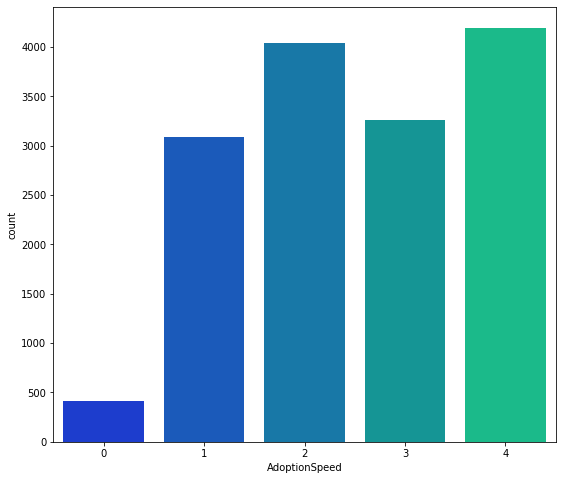

In [20]:
print(df.AdoptionSpeed.describe())
plt.figure(figsize=(9, 8))
sns.countplot(df.AdoptionSpeed, palette = 'winter');

The most frequent outcome is adoption after 100 days of being listed, slightly less frequent is adoption in 1st month after being listed. The least frequent outcome is adoption in the 1st day of listing.

#### Type

count     14988
unique        2
top         Dog
freq       8128
Name: Type, dtype: object


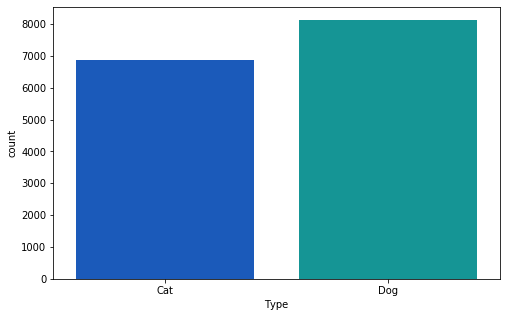

In [21]:
print(df.Type.describe())
plt.figure(figsize=(8, 5))
sns.countplot(df.Type, palette = 'winter');

There are more dogs in the dataset than cats.

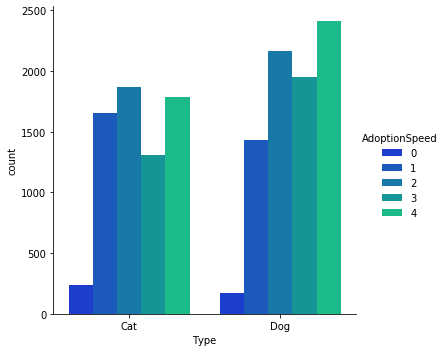

In [22]:
sns.catplot(x="Type", hue ="AdoptionSpeed", kind='count', data=df, palette = 'winter');

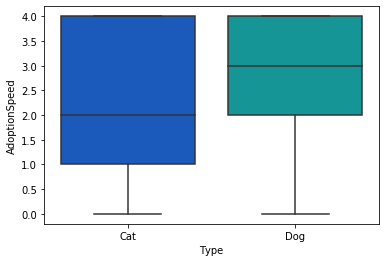

In [23]:
sns.boxplot(x="Type", y =df.AdoptionSpeed.astype(int), data=df, palette = 'winter');

Looks like cats in general are more adaptive than dogs - cats' AdoptionSpeed is lower (median=2) than than dogs' one (median=3). 

#### Gender 

count      14988
unique         3
top       Female
freq        7274
Name: Gender, dtype: object


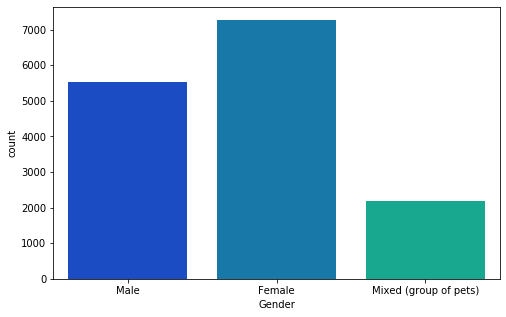

In [24]:
print(df.Gender.describe())
plt.figure(figsize=(8, 5))
sns.countplot(df.Gender, palette = 'winter');

There are more female animals in the dataset. 
The least frequant gender type is mixed.

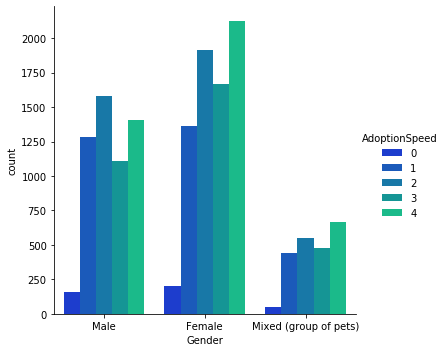

In [25]:
sns.catplot(x="Gender", hue ="AdoptionSpeed", kind='count', data=df, palette = 'winter');

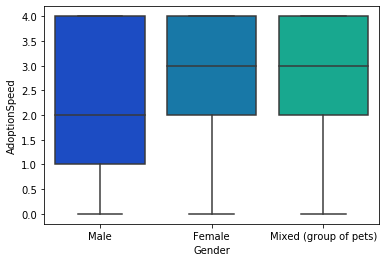

In [26]:
sns.boxplot(x="Gender", y =df.AdoptionSpeed.astype(int), data=df, palette = 'winter');

The adoption speed of females and mixed group animals is similar (median=3), while males have better adoption speed (median=2). 

#### Breed1

Let's look at cat and dog breeds.

count                    6860
unique                     67
top       Domestic Short Hair
freq                     3634
Name: Breed1, dtype: object


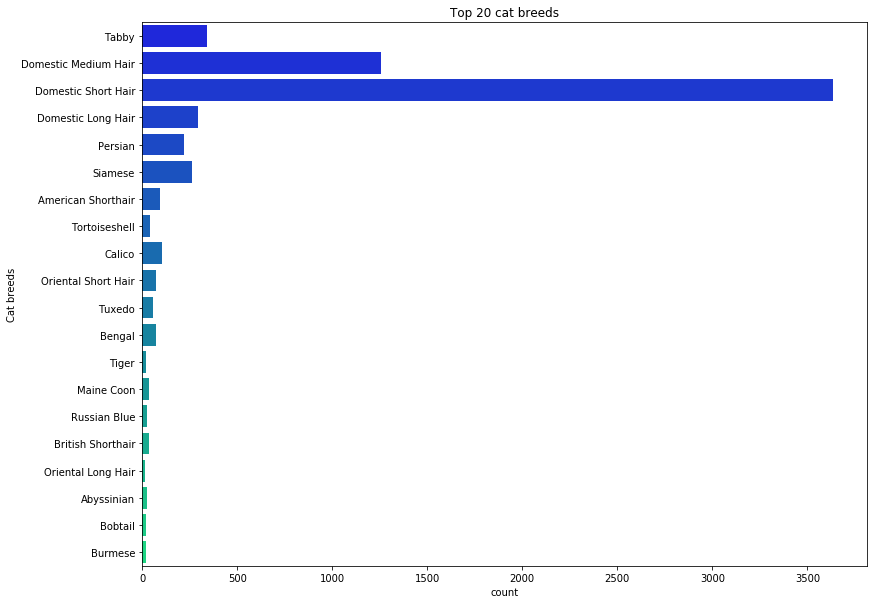

In [27]:
cats = df[df['Type'] == 'Cat']
top20_cat_breeds = cats.Breed1.value_counts().sort_values(ascending = False).iloc[:20].index.tolist()

print(cats.Breed1.describe())
plt.figure(figsize=(13,10))
ax1 = sns.countplot(y='Breed1', palette = 'winter', 
              data=cats[cats['Breed1'].isin(top20_cat_breeds)])
ax1.set(ylabel = 'Cat breeds')
ax1.set_title('Top 20 cat breeds')
plt.show()

The most frequant cat breeds are all domestic breeds, Tabby, Siamese and Persian. 
Domestic Short hair is the most frequant cat breed.

count            8128
unique            115
top       Mixed Breed
freq             5923
Name: Breed1, dtype: object


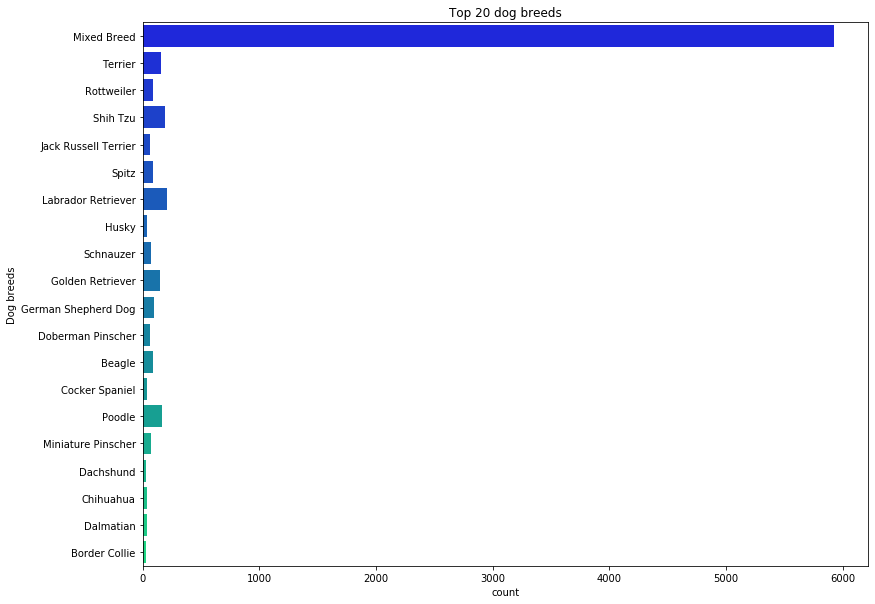

In [28]:
dogs = df[df['Type'] == 'Dog']
top20_dog_breeds = dogs.Breed1.value_counts().sort_values(ascending = False).iloc[:20].index.tolist()

print(dogs.Breed1.describe())
plt.figure(figsize=(13,10))
ax2 = sns.countplot(y='Breed1', palette = 'winter', 
              data=dogs[dogs['Breed1'].isin(top20_dog_breeds)])
ax2.set(ylabel = 'Dog breeds')
ax2.set_title('Top 20 dog breeds')

plt.show()

Mixed Breed is the most frequant dog breed.

#### Color1

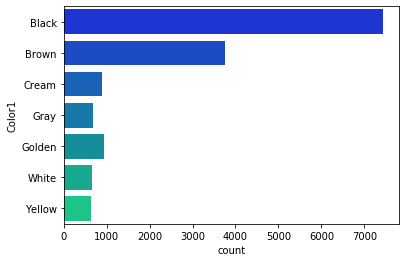

In [29]:
sns.countplot(y='Color1', palette = 'winter', data=df);

Most animals primary color is black.

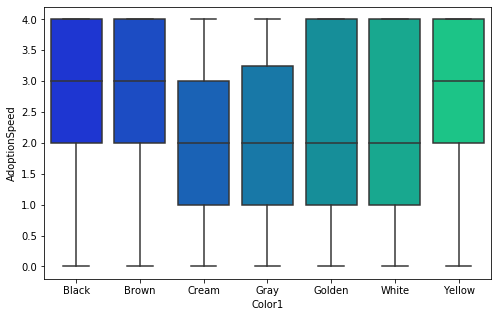

In [30]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="Color1", y =df.AdoptionSpeed.astype(int), data=df, palette = 'winter');

Cream, Gray, Golden and White colored animals are adopted faster.Those colors are more rare among animals, so dogs and cats of these colors  attract more attention. Also, those rare colors are likely to be more frequent among pure breed animals.

#### Age

count    14988.000000
mean        10.450027
std         18.151416
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64


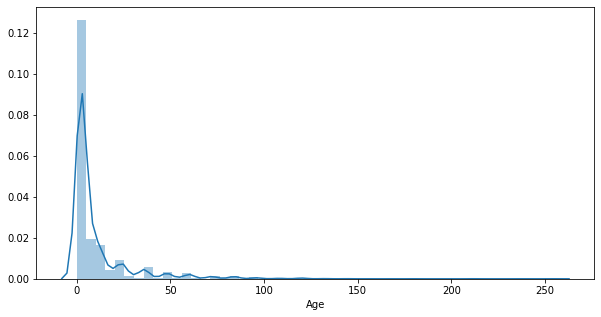

In [31]:
print(df.Age.describe())
plt.figure(figsize=(10, 5))
sns.distplot(df['Age'], kde = True);

75% of animals are aged 12 months and less. Distibution plot looks bad, so I'll create age bins.

In [32]:
age_bins = {
        (0, 6): '0 to 5 months',
        (6, 12): '6 to 11 months',
        (12, 36): '1 to 2 years',
        (36, 60): '3 to 4 years',
        (60, 96): '5 to 7 years',
        (96, np.inf): '8 and more years'}

df['Age_bins'] = None
for age_inter in age_bins.keys():
    df.loc[(age_inter[0] <= df['Age']) & (df['Age'] < age_inter[1]), 
           ['Age_bins']] = age_bins[age_inter]


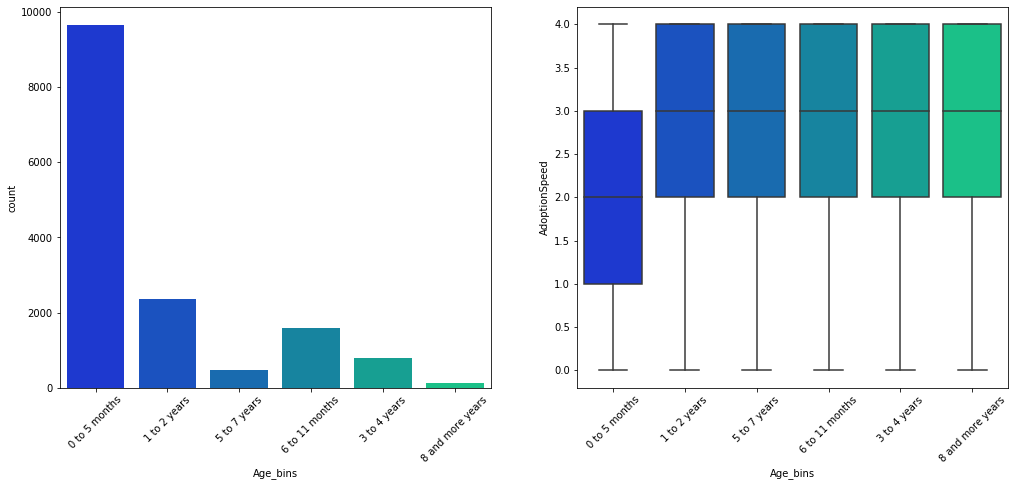

In [33]:
fig, axs = plt.subplots(ncols=2,figsize=(17,7))

ax1 = sns.countplot(x='Age_bins', palette = 'winter', data=df, ax=axs[0]);
plt.sca(ax1)
plt.xticks(rotation=45)
ax2 = sns.boxplot(x='Age_bins', y = df.AdoptionSpeed.astype(int), palette = 'winter', data=df, ax=axs[1]);
plt.sca(ax2)
plt.xticks(rotation=45);

Most animals are less than 6 months old. Kittens and puppies are adopted faster than adult animals.

### MaturitySize 

count      14988
unique         4
top       Medium
freq       10302
Name: MaturitySize, dtype: object


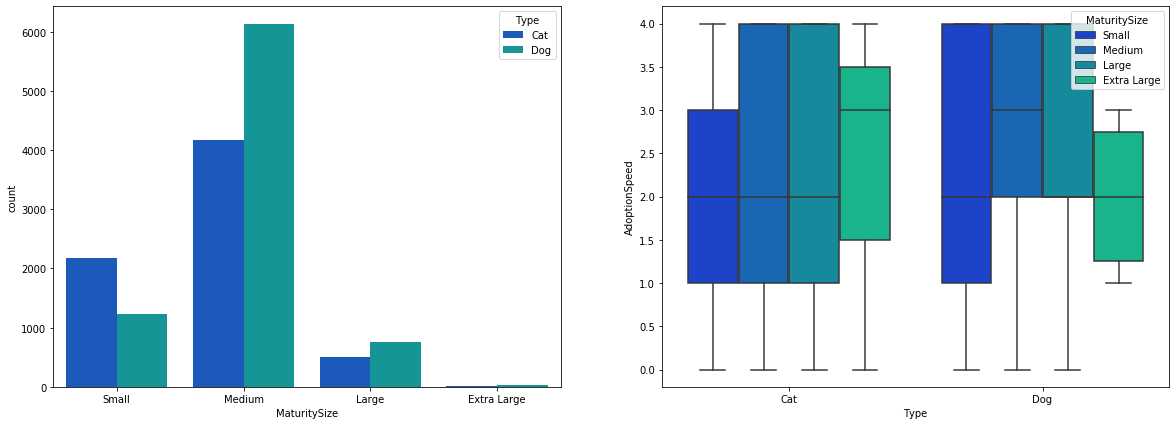

In [34]:
print(df.MaturitySize.describe())
fig, axs = plt.subplots(ncols=2,figsize=(20,7))
sns.countplot(x='MaturitySize', hue = 'Type',  palette = 'winter', data=df, ax=axs[0]);
sns.boxplot(x='Type', y = df.AdoptionSpeed.astype(int),hue = 'MaturitySize', palette = 'winter', data=df, ax=axs[1]);
plt.show()

Most dogs and cats are medium. There are few extra large animals to say that extra large animals are adopted faster or slower. For cats size does not really matter. Small dogs are adopted faster than medium ones.

### FurLength

count     14988
unique        3
top       Short
freq       8804
Name: FurLength, dtype: object


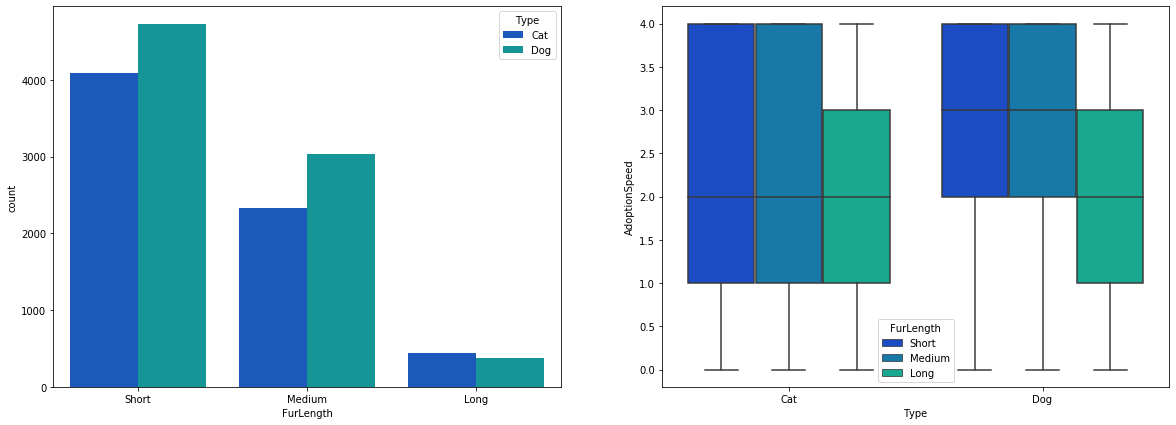

In [35]:
print(df.FurLength.describe())
fig, axs = plt.subplots(ncols=2,figsize=(20,7))
sns.countplot(x='FurLength', hue = 'Type',  palette = 'winter', data=df, ax=axs[0]);
sns.boxplot(x='Type', y = df.AdoptionSpeed.astype(int),hue = 'FurLength', palette = 'winter', data=df, ax=axs[1]);
plt.show()

Most animals fur is short or medium-length. Long fur is not as common as short and medium one, so I doubt fur length is important.

#### Vaccinated, Dewormed, Sterilized

In [36]:
df.Vaccinated.describe()

count     14988
unique        3
top          No
freq       7224
Name: Vaccinated, dtype: object

In [37]:
df.Dewormed.describe()

count     14988
unique        3
top         Yes
freq       8394
Name: Dewormed, dtype: object

In [38]:
df.Sterilized.describe()

count     14988
unique        3
top          No
freq      10072
Name: Sterilized, dtype: object

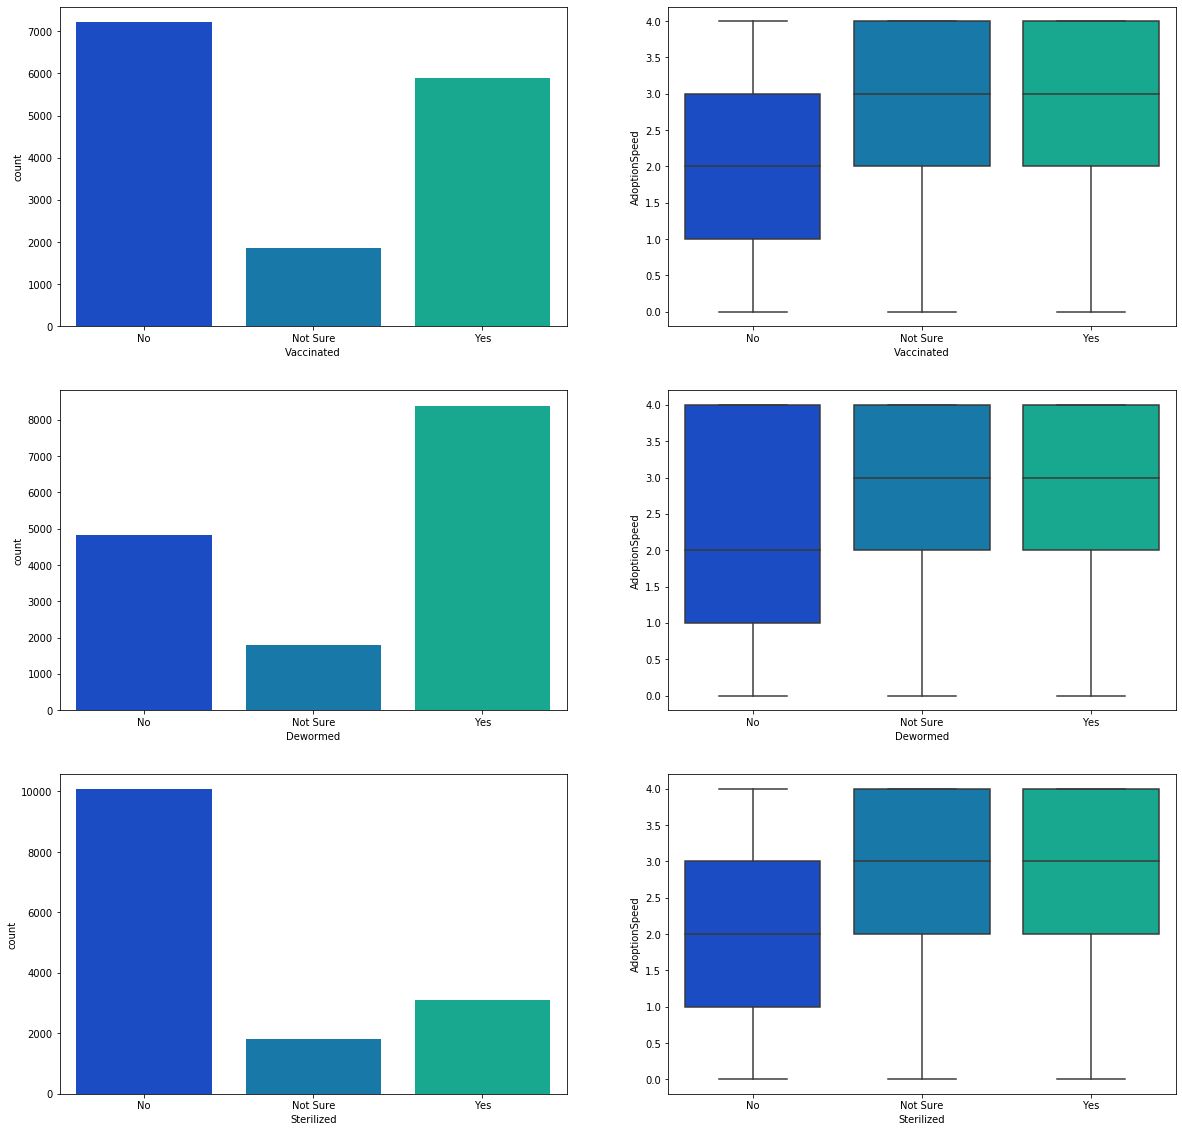

In [39]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
sns.countplot(x='Vaccinated', palette = 'winter', data=df, ax=axs[0, 0]);
sns.boxplot(x='Vaccinated', y = df.AdoptionSpeed.astype(int), palette = 'winter', data=df, ax=axs[0,1]);
sns.countplot(x='Dewormed', palette = 'winter', data=df, ax=axs[1, 0]);
sns.boxplot(x='Dewormed', y = df.AdoptionSpeed.astype(int), palette = 'winter', data=df, ax=axs[1,1]);
sns.countplot(x='Sterilized', palette = 'winter', data=df, ax=axs[2, 0]);
sns.boxplot(x='Sterilized', y = df.AdoptionSpeed.astype(int), palette = 'winter', data=df, ax=axs[2,1]);

Looks like all these things make adoption period longer. Maybe there are some connections between age of the animal and those features - very young animals are not vaccinated, dewormed or sterilized. 

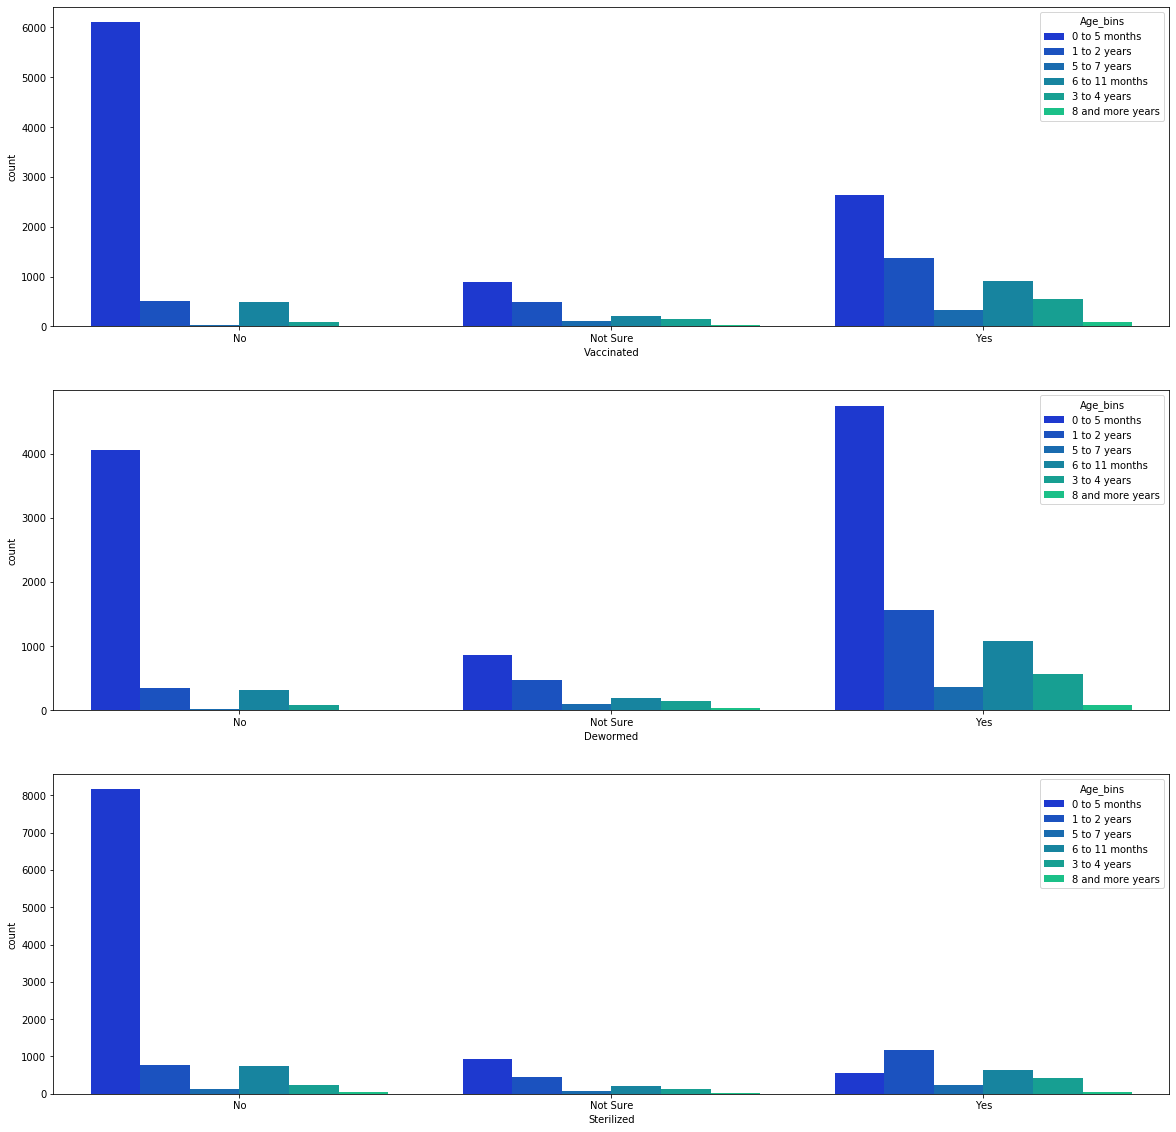

In [40]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.countplot(x='Vaccinated', hue='Age_bins',  palette = 'winter', data=df, ax=axs[0]);
sns.countplot(x='Dewormed',hue='Age_bins',  palette = 'winter', data=df, ax=axs[1]);
sns.countplot(x='Sterilized', hue='Age_bins', palette = 'winter', data=df, ax=axs[2]);

Most animals less than 6 months old are not vaccinated or sterilized.

#### Health

count       14988
unique          3
top       Healthy
freq        14473
Name: Health, dtype: object


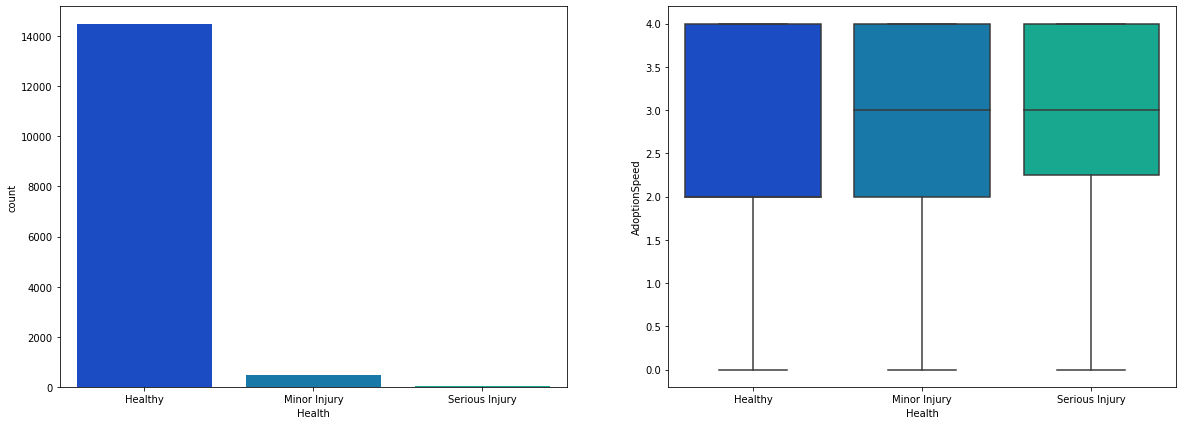

In [41]:
print(df.Health.describe())
fig, axs = plt.subplots(ncols=2,figsize=(20,7))
sns.countplot(x='Health',  palette = 'winter', data=df, ax=axs[0]);
sns.boxplot(x='Health', y = df.AdoptionSpeed.astype(int), palette = 'winter', data=df, ax=axs[1]);
plt.show()

Almost all animals are healthy (14473 out of 14988).

#### Quantity 

count    14988.000000
mean         1.576128
std          1.472647
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: Quantity, dtype: float64


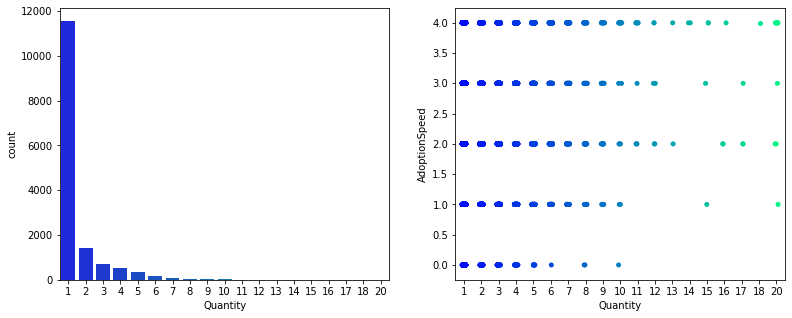

In [42]:
print(df.Quantity.describe())
fig, axs = plt.subplots(ncols=2,figsize=(13,5))
sns.countplot(x='Quantity',  palette = 'winter', data=df, ax=axs[0]);
sns.stripplot(x='Quantity', y = df['AdoptionSpeed'].astype(int), data =df, palette = 'winter',ax=axs[1])
plt.show()

Large number of animals is likely to have worse AdoptionSpeed.

#### Fee

count    14988.000000
mean        21.260342
std         78.424238
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3000.000000
Name: Fee, dtype: float64


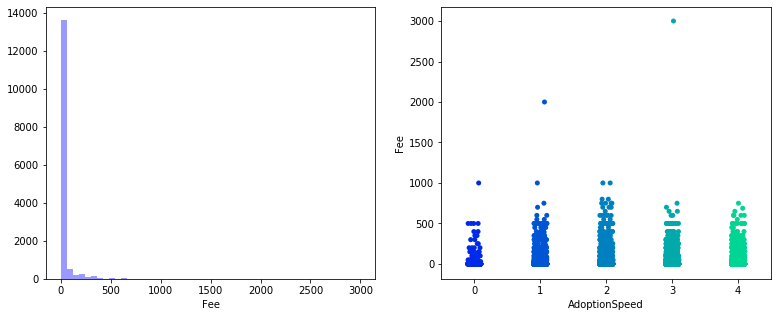

In [43]:
print(df.Fee.describe())
fig, axs = plt.subplots(ncols=2, nrows =1,figsize=(13,5))
sns.distplot(df['Fee'],  color = 'blue', kde = False, ax=axs[0]);
sns.catplot(y='Fee', x = 'AdoptionSpeed', data =df, palette = 'winter', kind = 'strip',ax=axs[1]);
plt.close(2)
plt.show()

Looks like there are 2 outliers, let's look at them and remove than.

In [44]:
fee_outliers_IDs = list(df[df['Fee'] > 1500].index)
df[df.index.isin(fee_outliers_IDs)]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed,Age_bins
PetID,,,,,,,,,,,,,,,,,,,,,,,,
e74dd0579,Dog,Khaleesi And Drogo,4,German Shepherd Dog,NaN,Mixed (group of pets),Black,Brown,NaN,Large,Medium,Yes,Yes,Not Sure,Healthy,2,3000,Kedah,39d5c79a7422fa53b8fdeaec67b3dbda,0,Both pups are family home trained. They love t...,5.0,3,0 to 5 months
31a77d7ba,Dog,Bull Dog,24,English Bulldog,NaN,Male,Brown,Cream,White,Medium,Short,Not Sure,Not Sure,Not Sure,Healthy,1,2000,Kuala Lumpur,a1c7a4f20bb936fcb8d97039741c40be,0,Found this bull dog near my neighbourhood for ...,3.0,1,1 to 2 years


In [45]:
# removing outliers
df.drop(fee_outliers_IDs, axis =0, inplace=True)

Let's look on these plots one more time after outliers removal.

count    14986.000000
mean        20.929534
std         72.785066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1000.000000
Name: Fee, dtype: float64


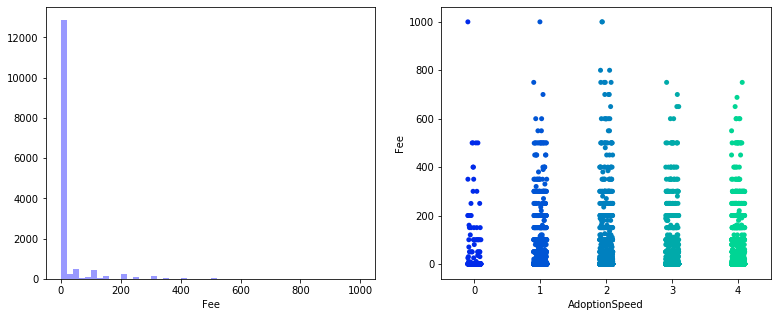

In [46]:
print(df.Fee.describe())
fig, axs = plt.subplots(ncols=2, nrows =1,figsize=(13,5))
sns.distplot(df['Fee'],  color = 'blue', kde = False, ax=axs[0]);
sns.catplot(y='Fee', x = 'AdoptionSpeed', data =df, palette = 'winter', kind = 'strip',ax=axs[1]);
plt.close(2)
plt.show()

Nothing special.

#### State

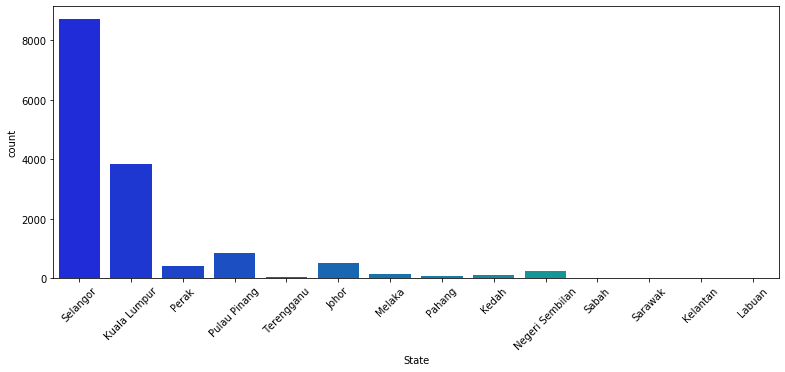

In [47]:
df.State.describe()
# fig, axs = plt.subplots(ncols=1, nrows =2,figsize=(13,17))
plt.figure(figsize=(13, 5))
ax1=sns.countplot(x='State',  palette = 'winter', data=df);
# plt.sca(ax1)
plt.xticks(rotation=45)
# ax2=sns.catplot(y='State', x = 'AdoptionSpeed', data =df, palette = 'winter', kind = 'box',ax = axs[1]);
# plt.close(2);
plt.show()

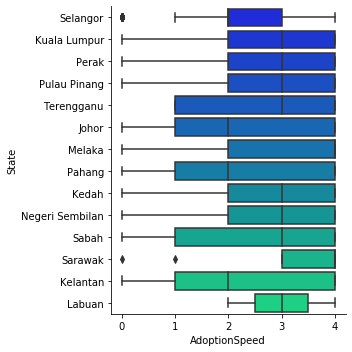

In [48]:
sns.catplot(y='State', x = 'AdoptionSpeed', data =df, palette = 'winter', kind = 'box');

#### RescuerID

In [49]:
df.RescuerID.describe()

count                                14986
unique                                5591
top       fa90fa5b1ee11c86938398b60abc32cb
freq                                   459
Name: RescuerID, dtype: object

Let's look on the number of rescued animals for each ResquerID

In [50]:
rescuers = pd.DataFrame(df.RescuerID.value_counts()).reset_index()
rescuers.columns = ['RescuerID', 'Number of rescued animals']
rescuers.head()

,RescuerID,Number of rescued animals
0,fa90fa5b1ee11c86938398b60abc32cb,459
1,aa66486163b6cbc25ea62a34b11c9b91,315
2,c00756f2bdd8fa88fc9f07a8309f7d5d,231
3,b53c34474d9e24574bcec6a3d3306a0d,228
4,ee2747ce26468ec44c7194e7d1d9dad9,156


In [51]:
rescuers['Number of rescued animals'].describe()

count    5591.000000
mean        2.680379
std        10.388189
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       459.000000
Name: Number of rescued animals, dtype: float64

At least 75% percent of resquers saved 2 and less animals only. 

In [52]:
rescuers.columns

Index(['RescuerID', 'Number of rescued animals'], dtype='object')

In [53]:
df['RescuerNumber'] = df['RescuerID'].map(dict(zip(rescuers.RescuerID,
                                                  rescuers['Number of rescued animals'])))

In [54]:
df['RescuerNumber'].describe()

count    14986.000000
mean        42.934072
std         96.501305
min          1.000000
25%          1.000000
50%          5.000000
75%         28.000000
max        459.000000
Name: RescuerNumber, dtype: float64

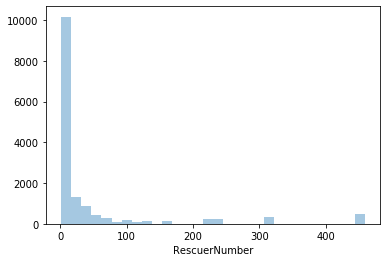

In [55]:
sns.distplot(df['RescuerNumber'], kde = False, bins = 30);

#### VideoAmt and PhotoAmt

In [56]:
print(df['VideoAmt'].describe())

count    14986.000000
mean         0.056786
std          0.346263
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: VideoAmt, dtype: float64


In [57]:
print("{0:.2%} of pets don't have videos".format(
    df[df['VideoAmt'] == 0].shape[0] / float(df.shape[0])))

96.17% of pets don't have videos


count    14986.000000
mean         3.888896
std          3.487946
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: PhotoAmt, dtype: float64


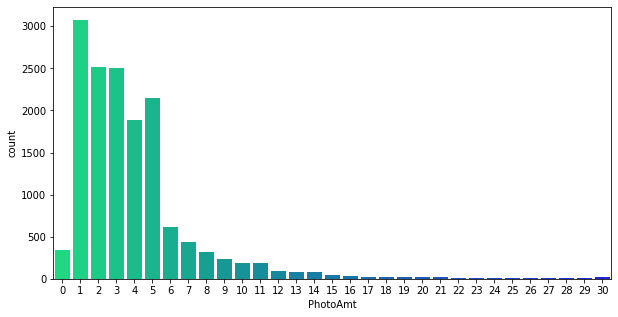

In [58]:
print(df['PhotoAmt'].describe())
plt.figure(figsize=(10, 5))
sns.countplot(df['PhotoAmt'].astype(int), palette='winter_r');

Most animals have from 1 to 5 photos.

# 2. Feature Engineering

In [59]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed,Age_bins,RescuerNumber
PetID,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,Cat,Nibble,3,Tabby,NaN,Male,Black,White,NaN,Small,Short,No,No,No,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2,0 to 5 months,8
6296e909a,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,NaN,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,2.0,0,0 to 5 months,1
3422e4906,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,NaN,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,7.0,3,0 to 5 months,459
5842f1ff5,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,NaN,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",8.0,2,0 to 5 months,50
850a43f90,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,NaN,Medium,Short,No,No,No,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,3.0,2,0 to 5 months,134


## Feature selection

In [60]:
# drop columns: Age,Description
df.drop(['Age_bins','Description','RescuerID','RescuerNumber'],axis=1, inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14986 entries, 86e1089a3 to a83d95ead
Data columns (total 21 columns):
Type             14986 non-null object
Name             13730 non-null object
Breed1           14986 non-null object
Breed2           4226 non-null object
Gender           14986 non-null object
Color1           14986 non-null object
Color2           10516 non-null object
Color3           4386 non-null object
MaturitySize     14986 non-null object
FurLength        14986 non-null object
Vaccinated       14986 non-null object
Dewormed         14986 non-null object
Sterilized       14986 non-null object
Health           14986 non-null object
Quantity         14986 non-null int64
Fee              14986 non-null int64
State            14986 non-null object
VideoAmt         14986 non-null int64
PhotoAmt         14986 non-null float64
AdoptionSpeed    14986 non-null category
Age_bins         14986 non-null object
dtypes: category(1), float64(1), int64(3), object(16)
memory usage:

## Fill NaN

In [62]:
df.Name.fillna('Missing',inplace=True)
df.Breed2.fillna('Missing',inplace=True)
df.Color2.fillna('Missing',inplace=True)
df.Color3.fillna('Missing',inplace=True)

In [63]:
df.head()

,Type,Name,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,Age_bins
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,Cat,Nibble,Tabby,Missing,Male,Black,White,Missing,Small,Short,No,No,No,Healthy,1,100,Selangor,0,1.0,2,0 to 5 months
6296e909a,Cat,No Name Yet,Domestic Medium Hair,Missing,Male,Black,Brown,Missing,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,0,2.0,0,0 to 5 months
3422e4906,Dog,Brisco,Mixed Breed,Missing,Male,Brown,White,Missing,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,0,7.0,3,0 to 5 months
5842f1ff5,Dog,Miko,Mixed Breed,Missing,Female,Black,Brown,Missing,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,0,8.0,2,0 to 5 months
850a43f90,Dog,Hunter,Mixed Breed,Missing,Male,Black,Missing,Missing,Medium,Short,No,No,No,Healthy,1,0,Selangor,0,3.0,2,0 to 5 months


## One-hot encoding 

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [65]:
onehot_features = ['Type', 'Name', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2','Color3','Vaccinated','Dewormed'
                   ,'Sterilized','State','Age_bins']

In [66]:
encoded_features = []
for feature in onehot_features:
    encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
    n = df[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df.index
    encoded_features.append(encoded_df)

In [67]:
df = pd.concat([df, *encoded_features[:12]], axis=1)

In [68]:
df.drop(onehot_features,axis=1,inplace=True)

## Label Encoding

In [69]:
label_features = ['MaturitySize','FurLength','Health']

In [70]:
for feature in label_features:        
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [72]:
df.head()

,MaturitySize,FurLength,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,Type_1,Type_2,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,Name_11,Name_12,Name_13,Name_14,Name_15,...,Color3_5,Color3_6,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,State_10,State_11,State_12,State_13,State_14
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,2,0,1,100,0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6296e909a,2,1,0,1,0,0,2.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3422e4906,2,1,0,1,0,0,7.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5842f1ff5,2,2,0,1,150,0,8.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850a43f90,2,2,0,1,0,0,3.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 3. Modeling

In [73]:
X = df.drop('AdoptionSpeed',axis =1)

In [74]:
y = df.AdoptionSpeed

In [83]:
from sklearn.model_selection import train_test_split
(Xtrain, Xtest, yTrain, yTest) = train_test_split(
X, y, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', 
                               n_estimators=1100,
                               max_depth=5,
                               min_samples_split=4,
                               min_samples_leaf=5,
                               max_features='auto',
                               oob_score=True,
                               random_state=42,
                               n_jobs=-1,
                               verbose=1)

In [85]:
model.fit(Xtrain,yTrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    7.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1,
                       warm_start=False)

In [86]:
yPredict = model.predict(Xtest)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.5s finished


# 4. Evaluation

## 4.1 Feature Importance 

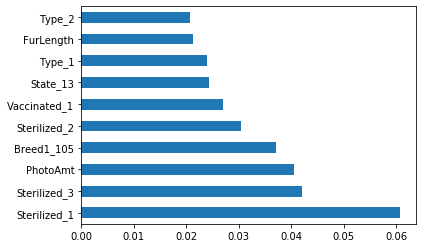

In [134]:
feat_importances = pd.Series(model.feature_importances_, index=Xtrain.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 4.2 Confusion matrix

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion = confusion_matrix(yTest,yPredict)

In [113]:
df_cm = pd.DataFrame(confusion)

In [114]:
df_cm

,0,1,2,3,4
0,0,0,43,0,74
1,0,0,340,0,468
2,0,0,396,0,587
3,0,0,285,0,534
4,0,0,197,0,823


In [112]:
import seaborn as sns

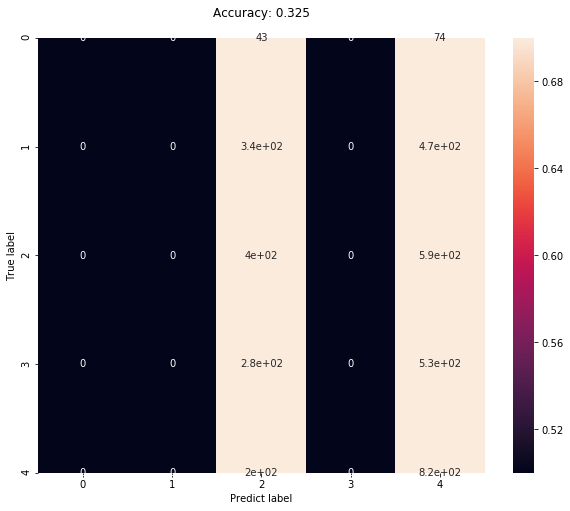

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,vmin=0.5, vmax=0.7)
plt.title('Accuracy: {0:.3f}\n'.format(accuracy_score(yTest,yPredict)))
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

## 4.3. Classification reports

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(yTest,yPredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.00      0.00      0.00       808
           2       0.31      0.40      0.35       983
           3       0.00      0.00      0.00       819
           4       0.33      0.81      0.47      1020

    accuracy                           0.33      3747
   macro avg       0.13      0.24      0.16      3747
weighted avg       0.17      0.33      0.22      3747



/Users/apple/Development/env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
